In [1]:
%cd ..

/Users/pavanpreetgandhi/git-repos/WebOptEnv


In [2]:
import dspy

from web_opt.server.web_opt_environment import WebOptEnvironment
from web_opt.models import WebOptAction, WebOptObservation, WebOptState, WebsiteState, LighthouseScores, VerificationScores
from web_opt import WebOptAction, WebOptEnv

In [ ]:
lm = dspy.LM(
    "anthropic/claude-sonnet-4-5-20250929",
    api_key="" # Add your Anthropic API key here
)
dspy.configure(lm=lm)

In [4]:
class WebAgentSignature(dspy.Signature):
    """Modify a single file in the codebase to imporve website performance, SEO, and accessibility."""
    code: dict[str, str] = dspy.InputField(desc="A dictionary mapping file paths to their corresponding code content.")
    file_name: str = dspy.OutputField(desc="The file path of the file to be modified.")
    modified_code: str = dspy.OutputField(desc="The modified code of the specified file.")

# web_agent = dspy.Predict(WebAgentSignature)
web_agent = dspy.ChainOfThought(WebAgentSignature)

In [5]:
env = WebOptEnv(base_url="http://localhost:8000")
obs = env.reset()
print(f'Initial Reward: {obs.reward}')

actions = []
rewards = []
for i in range(10):
    prediction = web_agent(code=obs.observation.site.code)
    step_code = {
        prediction.file_name: prediction.modified_code
    }
    actions.append(step_code)
    print(f"Modifying file: {prediction.file_name}")
    action = WebOptAction(site=WebsiteState(code=step_code))
    obs = env.step(action)
    print(f"Reward: {obs.reward}")
    rewards.append(obs.reward)
    print(f"Step {i+1} completed.\n{'='*60}\n")

Initial Reward: 0
Modifying file: /tmp/current_project/src/pages/Home.jsx
Reward: 0.0
Step 1 completed.

Modifying file: /tmp/current_project/src/main.jsx
Reward: -0.25
Step 2 completed.

Modifying file: /tmp/current_project/src/index.css
Reward: 0.0
Step 3 completed.

Modifying file: /tmp/current_project/src/pages/Home.jsx
Reward: 0.10434614798262343
Step 4 completed.

Modifying file: /tmp/current_project/src/main.jsx
Reward: 0.0
Step 5 completed.



2025/11/30 13:12:08 WARNING dspy.clients.lm: LM response was truncated due to exceeding max_tokens=None. You can inspect the latest LM interactions with `dspy.inspect_history()`. To avoid truncation, consider passing a larger max_tokens when setting up dspy.LM. You may also consider increasing the temperature (currently None)  if the reason for truncation is repetition.


Modifying file: /tmp/current_project/src/main.jsx
Reward: -0.0
Step 6 completed.

Modifying file: /tmp/current_project/src/main.jsx
Reward: 19.617075820733206
Step 7 completed.

Modifying file: /tmp/current_project/src/pages/Home.jsx
Reward: -0.3274999428299589
Step 8 completed.

Modifying file: /tmp/current_project/src/pages/Home.jsx
Reward: 0.2623998423202361
Step 9 completed.

Modifying file: /tmp/current_project/src/pages/Home.jsx
Reward: 0.0
Step 10 completed.



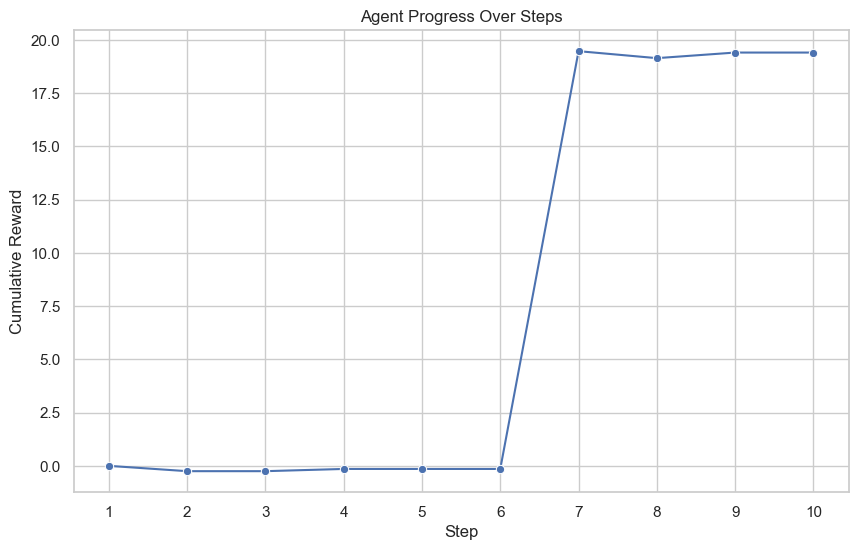

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='notebook', style='whitegrid')

cumulative_rewards = [sum(rewards[:i+1]) for i in range(len(rewards))]
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, len(cumulative_rewards) + 1), y=cumulative_rewards, marker='o')
plt.title('Agent Progress Over Steps')
plt.xlabel('Step')
plt.ylabel('Cumulative Reward')
plt.xticks(range(1, len(cumulative_rewards) + 1))
plt.show()

In [18]:
for idx in range(len(actions)):
    action = actions[idx]
    file = list(action.keys())[0]
    modified_code = action[file]
    print(f"Step {idx+1} - Modified File: {file}\n")
    print(modified_code)
    print("\n" + "="*80 + "\n")

Step 1 - Modified File: /tmp/current_project/src/pages/Home.jsx

import React, { useState, useCallback, memo, useEffect } from 'react'
import coinImage from '../assets/coin.jpg'
import './Home.css'

const Home = memo(() => {
  const [tails, setTails] = useState(0)
  const [heads, setHeads] = useState(0)
  const [clicked, setClicked] = useState(false)
  const [isFlipping, setIsFlipping] = useState(false)

  // Preload the coin image for better performance
  useEffect(() => {
    const img = new Image()
    img.src = coinImage
  }, [])

  const handleFlip = useCallback(() => {
    if (isFlipping) return // Prevent multiple clicks during animation
    
    setIsFlipping(true)
    setClicked(true)
    
    // Use requestAnimationFrame for smoother animation
    requestAnimationFrame(() => {
      setTimeout(() => {
        const isHeads = Math.random() < 0.5
        
        if (isHeads) {
          setHeads(prevHeads => prevHeads + 1)
        } else {
          setTails(prevTails => prevT